## Cognifyz  Data Analysis

In [1]:
# Importing Libraries 

import pandas as pd  # For Data Manipulation
import numpy as np  
import matplotlib.pyplot as plt # Data Vsualization
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)  # Display all columns


In [2]:
# Reading the Data using pandas 

df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking Null Values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# Checking Duplicates

df.duplicated().sum()

0

In [5]:
# Other Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Statistical Summary

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Data Cleaning 

In [7]:
def remove_spc_character(df, columns, spc_character ):
    # This Function remove the character from the column and return dataset
    for col in columns:
        for char in spc_character:
            df[col]= df[col].str.replace(char,'')
    return df

In [8]:
# There are some special character that are inappropriate we need to remove them to clean the data
columns = df.select_dtypes(include="O").columns

spc_character = ["�", "��","�_","_"]

In [9]:
df = remove_spc_character(df, columns, spc_character)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac۱,208,stanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Task List

## Level 1

### Task 1  - Top Cuisines

### Q1. Determine the top three most common cuisines in the dataset.

In [10]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
Common_Cuisines = df['Cuisines'].value_counts().head(5)
Common_Cuisines

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

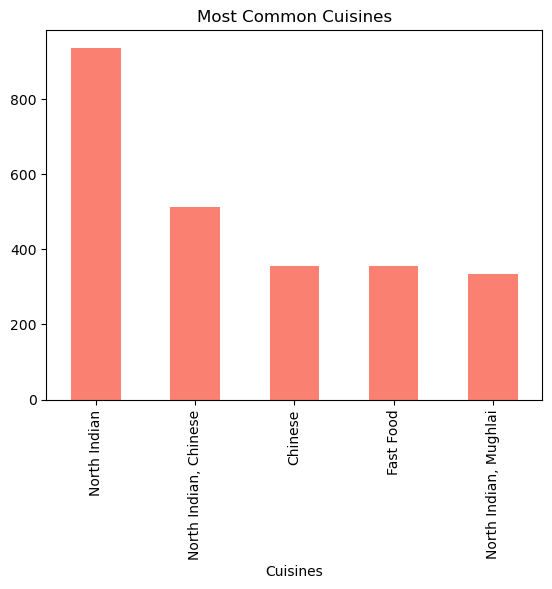

In [12]:
Common_Cuisines.plot(kind='bar', color ="salmon")
plt.title("Most Common Cuisines")
plt.xlabel("Cuisines")
plt.show()

### North Indian, North Indian,Chinese and Chinese are the top three Most common Cuisines. 

#### Q2 - Calculate the percentage of restaurants that serve each of the top cuisines.

In [13]:
common_cuisine_restaurants = df[df['Cuisines'].isin(Common_Cuisines.index)]

In [14]:
perentage_per_cuisines = common_cuisine_restaurants['Cuisines'].value_counts(normalize=True)*100
perentage_per_cuisines

North Indian             37.605464
North Indian, Chinese    20.530333
Chinese                  14.222579
Fast Food                14.222579
North Indian, Mughlai    13.419044
Name: Cuisines, dtype: float64

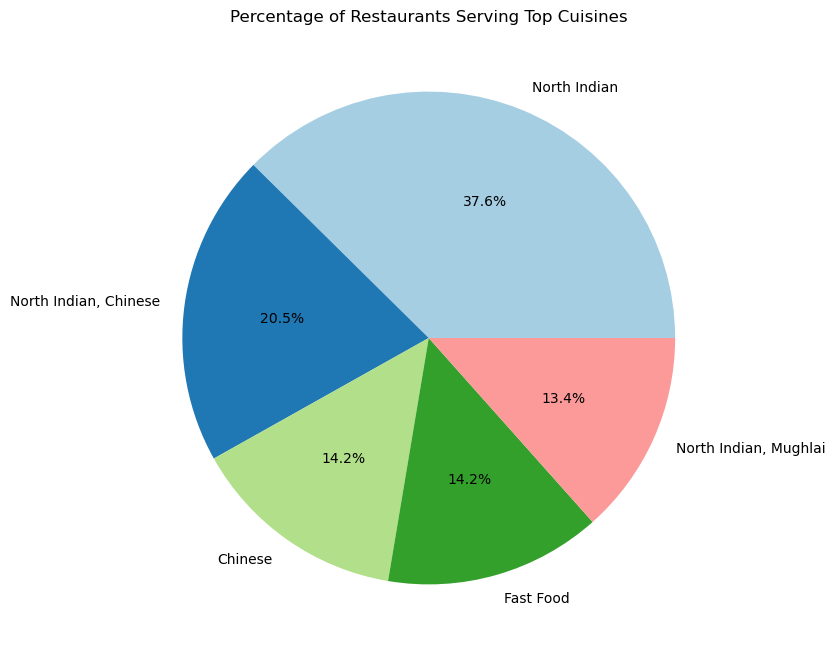

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(perentage_per_cuisines, labels=perentage_per_cuisines.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of Restaurants Serving Top Cuisines')
plt.show()

###  1 .North Indian cuisine is the most prevalent, with 37.6% of restaurants offering this cuisine. This suggests a strong preference or demand for North Indian flavors in the region.

### 2.The combination of North Indian and Chinese cuisines, making up 20.5%, indicates a significant interest in restaurants offering a fusion of these two popular cuisines. This trend may be driven by customers seeking diverse dining experiences.

### 3.Chinese cuisine holds a notable share at 14.2%, highlighting its popularity as a standalone choice. Restaurants specializing in Chinese dishes may find a steady customer base.

### Task 2 - City Analysis

### Q1. Identify the city with the highest number of restaurants in the dataset.

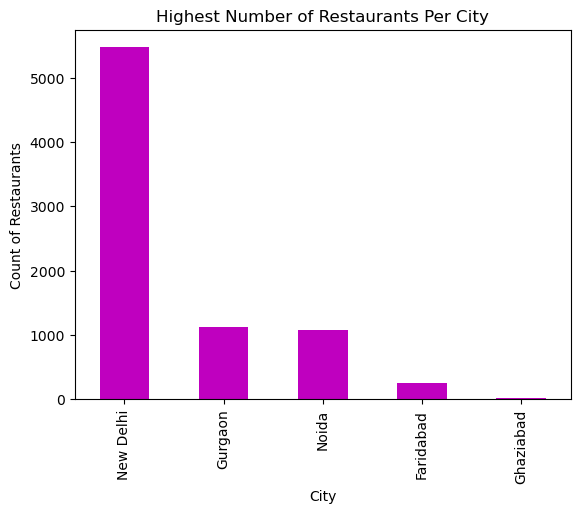

In [16]:
city_restaurant_counts  = df.groupby("City")["Restaurant ID"].count().sort_values(ascending = False).nlargest(5)

city_restaurant_counts.plot(kind ="bar", color="m")
plt.title("Highest Number of Restaurants Per City")
plt.xlabel("City")
plt.ylabel("Count of Restaurants")
plt.show()

### New Delhi Has the Highest Number of Restaurants with than 5400 Restaurants followed by Gurgaon.

### Q2.Calculate the average rating for restaurants in each city

In [17]:
average_rating_per_city  = df.groupby("City")["Aggregate rating"].mean()

average_rating_per_city

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64

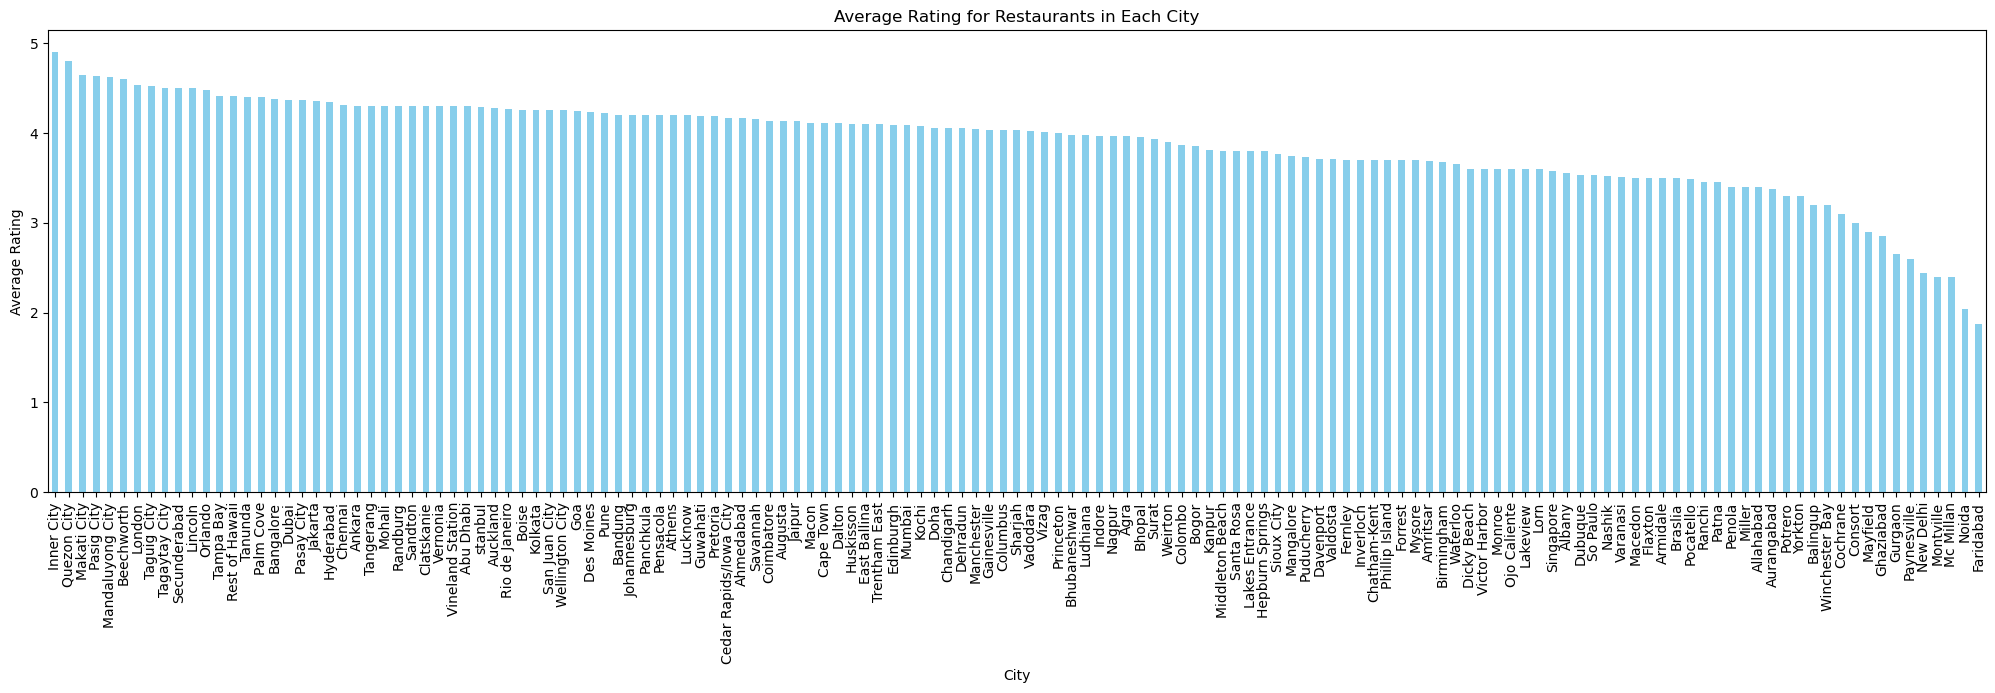

In [18]:
plt.figure(figsize=(25, 6))
average_rating_per_city.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Rating for Restaurants in Each City')
plt.ylabel('Average Rating')
plt.xlabel('City')
plt.show()

### Q3. Determine the city with the highest average rating.

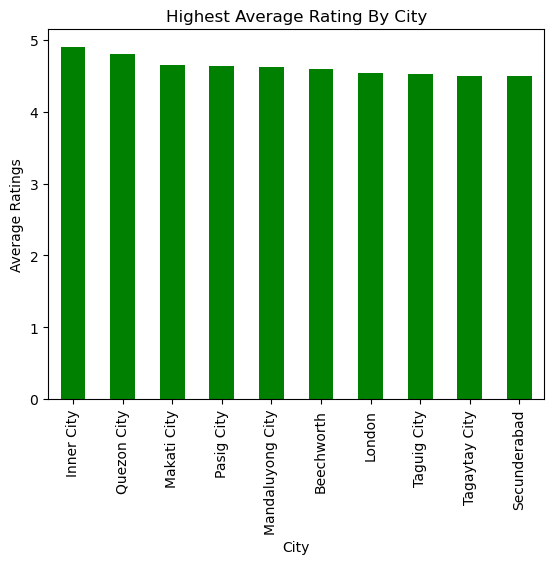

In [19]:
highest_average_city = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending = False).head(10)

highest_average_city.plot(kind ="bar", color="g")
plt.title("Highest Average Rating By City")
plt.ylabel("Average Ratings")
plt.xlabel("City")
plt.show()

### Inner City Has the Highest Average rating as compared to others followed by Quezon City.

### Task 3 - Price Range Distribution

### Q1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.


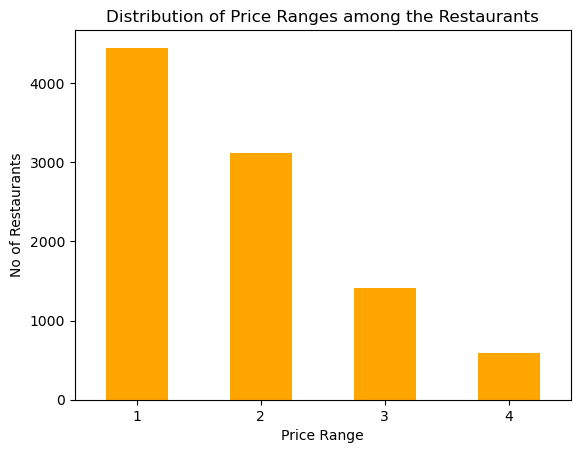

In [20]:
price_range =df.groupby("Price range")["Restaurant ID"].count()
price_range.plot(kind="bar", color="orange")

plt.title("Distribution of Price Ranges among the Restaurants")
plt.xlabel("Price Range")
plt.xticks(rotation=360)
plt.ylabel("No of Restaurants")
plt.show()

### Most Number of Restaurant falls on the price range of 1 followed by 2 

### Q2. Calculate the percentage of restaurants in each price range category.

In [21]:
percentage_price_range = df['Price range'].value_counts(normalize=True)*100
percentage_price_range

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

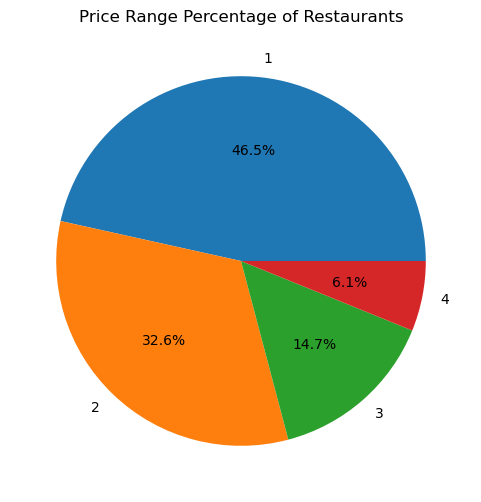

In [22]:
plt.figure(figsize=(6,6))
plt.pie(percentage_price_range, labels=percentage_price_range.index, autopct='%1.1f%%')
plt.title("Price Range Percentage of Restaurants")
plt.show()

### The data reveals that in the local dining landscape, with 46.5% of restaurants positioned in the affordable price range of 1.

### Task 4 - Online Delivery

### Q1.Determine the percentage of restaurants that offer online delivery.

In [23]:
online_del = df["Has Online delivery"].value_counts(normalize= True) *100
online_del

No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

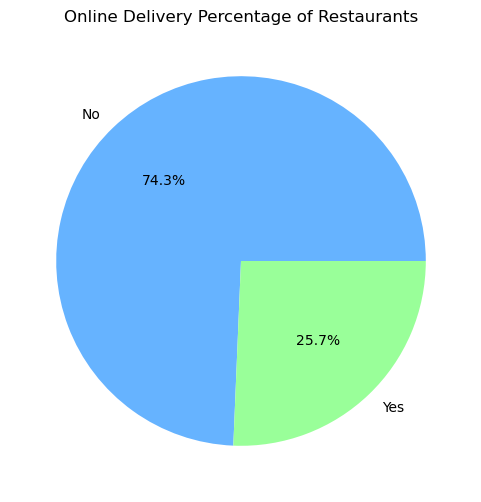

In [24]:
colors = ['#66b3ff','#99ff99']


plt.figure(figsize=(6,6))
plt.pie(online_del, labels=online_del.index, autopct='%1.1f%%', colors=colors)
plt.title("Online Delivery Percentage of Restaurants")
plt.show()

### About 74% Restaurants Does not have Online Delivery

In [25]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Q2.Compare the average ratings of restaurants with and without online delivery.


In [26]:
average_ratings = df.groupby("Has Online delivery")['Aggregate rating'].mean()
average_ratings

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

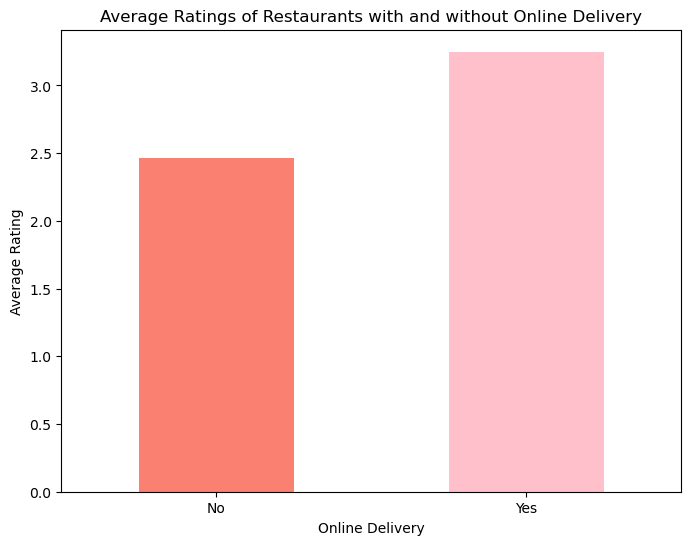

In [27]:
plt.figure(figsize=(8, 6))
average_ratings.plot(kind='bar', color=['salmon', 'pink'])
plt.title('Average Ratings of Restaurants with and without Online Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

### It has been clearly saw that the Average Rating of Restaurants having Online Delivery is more than that of Restaurants does not have Online Delivery